In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import math

import seaborn as sns
import datetime as dt

from matplotlib.patches import Circle
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [11]:
dengue2019 = pd.read_csv(r"/content/drive/MyDrive/dengue covid/doh-epi-dengue-cases-2019 (1).csv")

In [9]:
dengue2019

,loc,cases,deaths,date,Region,year,month
1,DAGUPAN CITY,7,0,2019-01-13,Region I-ILOCOS REGION,2019,1
2,DAGUPAN CITY,6,0,2019-01-20,Region I-ILOCOS REGION,2019,1
3,DAGUPAN CITY,6,0,2019-01-27,Region I-ILOCOS REGION,2019,1
4,DAGUPAN CITY,7,0,2019-02-03,Region I-ILOCOS REGION,2019,2
5,DAGUPAN CITY,5,0,2019-02-10,Region I-ILOCOS REGION,2019,2
...,...,...,...,...,...,...,...
6422,VALENZUELA CITY,21,0,2019-12-01,NATIONAL CAPITAL REGION,2019,12
6423,VALENZUELA CITY,29,0,2019-12-08,NATIONAL CAPITAL REGION,2019,12
6424,VALENZUELA CITY,25,0,2019-12-15,NATIONAL CAPITAL REGION,2019,12
6425,VALENZUELA CITY,24,0,2019-12-22,NATIONAL CAPITAL REGION,2019,12


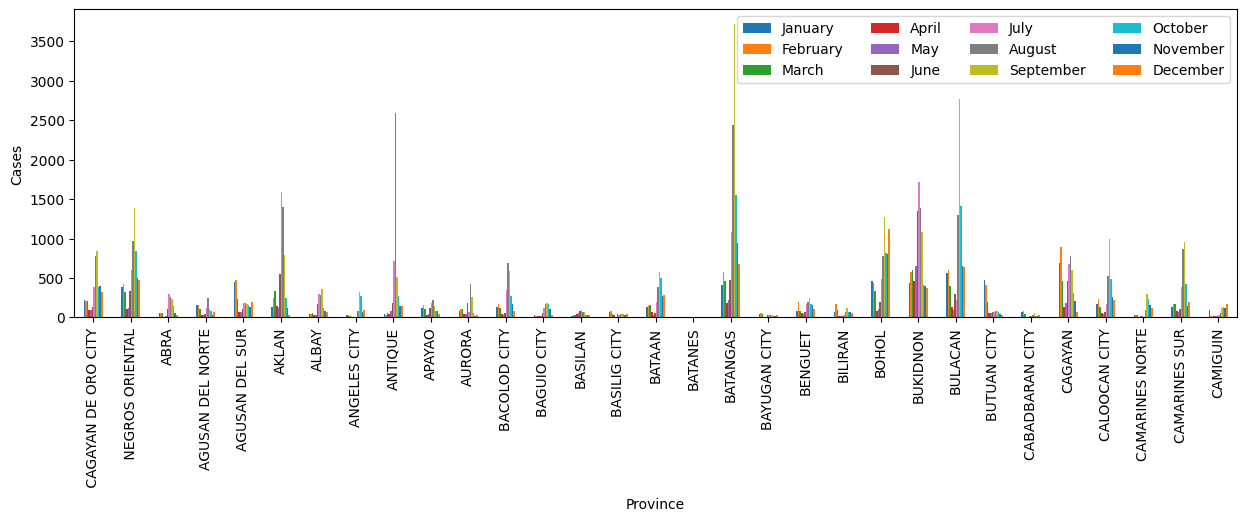

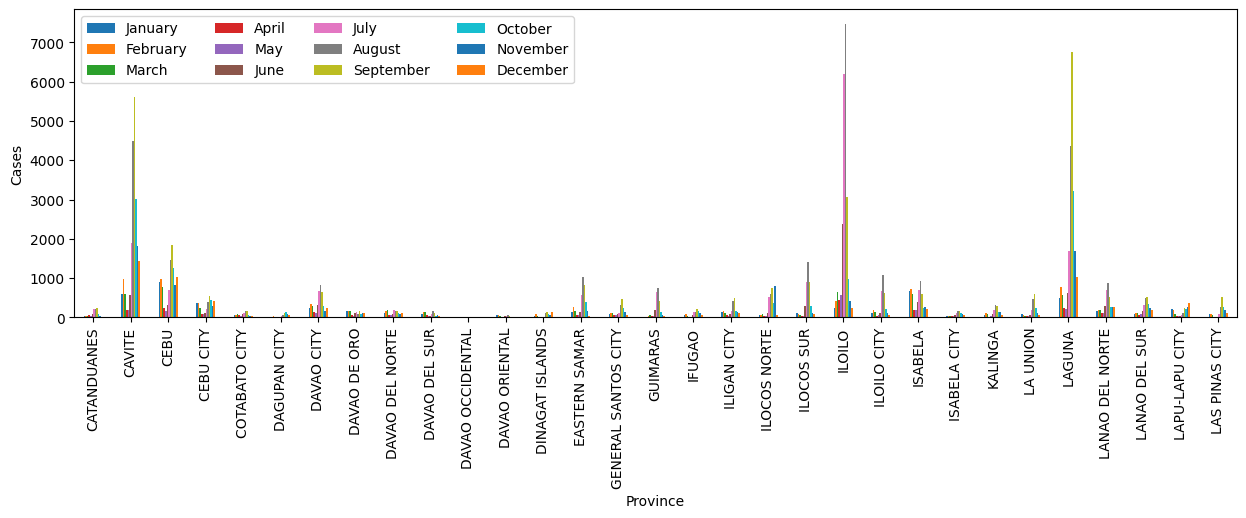

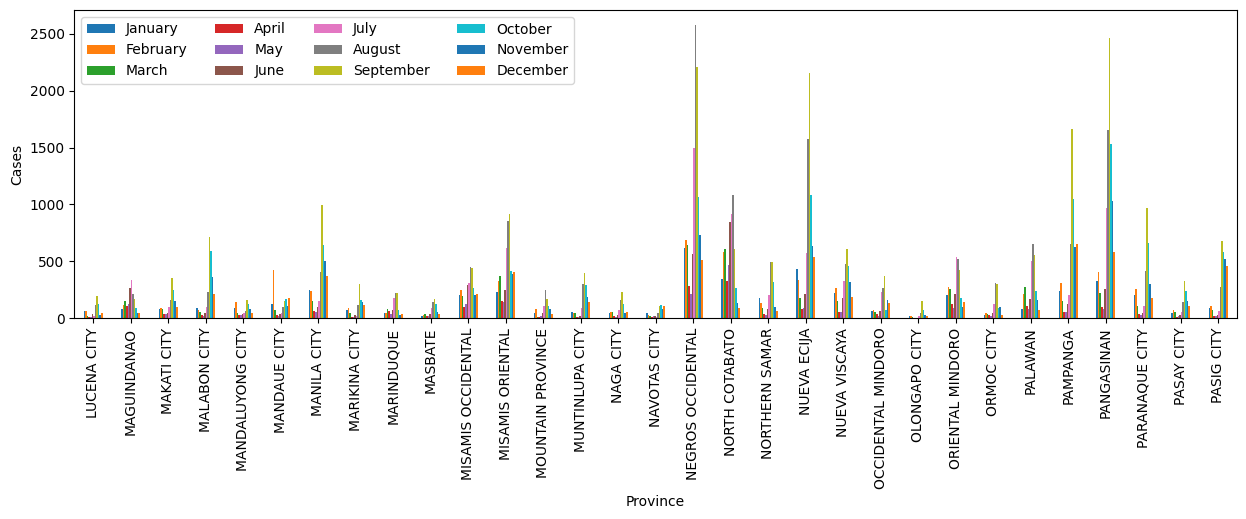

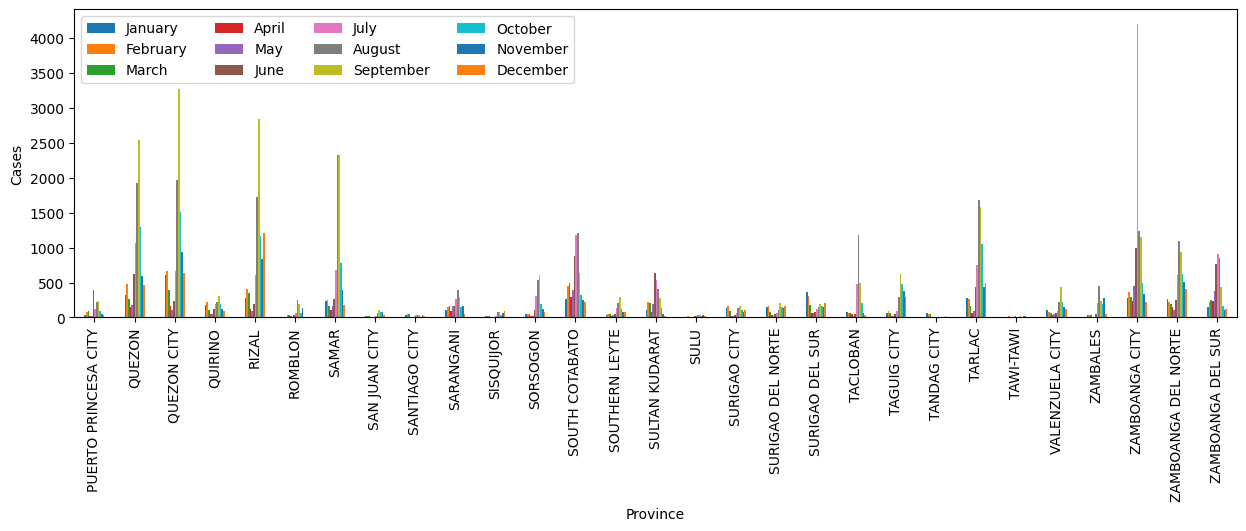

In [12]:
dengue2019 = dengue2019.drop(dengue2019.index[0])
parser = pd.to_datetime(dengue2019["date"],format='%d/%m/%Y')
dengue2019['date'] = parser
dengue2019['month'] = dengue2019['date'].dt.month
dengue2019['year'] = dengue2019['date'].dt.year
dengue2019["cases"] = dengue2019["cases"].astype(str).astype(int)
df_bar = dengue2019.groupby(["loc","month"])["cases"].sum()
df_bar = df_bar.unstack()
df_bar_1 = df_bar[0:31]
df_bar_2 = df_bar[32:63]
df_bar_3 = df_bar[64:95]
df_bar_4 = df_bar[96:-1]
fig = df_bar_1.plot.bar(legend=True,figsize=(15,4),ylabel="Cases",xlabel="Province",width=0.5).figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],ncol = 4)
fig1 = df_bar_2.plot.bar(legend=True,figsize=(15,4), ylabel="Cases",xlabel="Province",width=0.5).figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],ncol = 4)
fig3 = df_bar_3.plot.bar(legend=True,figsize=(15,4), ylabel="Cases",xlabel="Province",width=0.5).figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],ncol = 4)
fig4 = df_bar_4.plot.bar(legend=True,figsize=(15,4), ylabel="Cases",xlabel="Province",width=0.5).figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],ncol = 4)

Text(0.5, 1.0, '2019 Dengue Cases by Province')

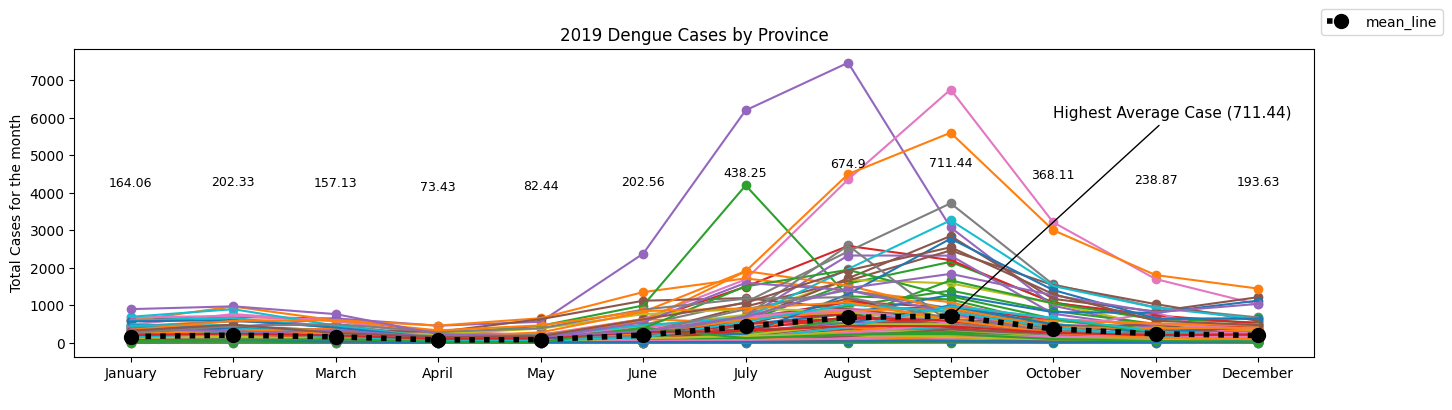

In [13]:
dengue2019_sct = dengue2019.groupby(["loc","month"])["cases"].sum()
dengue2019_sct = pd.DataFrame(dengue2019_sct)
loc = []
month = []
for i in range(len(dengue2019_sct)):
  loc.append(dengue2019_sct.index[i][0])
for i in range(len(dengue2019_sct)):
  month.append(dengue2019_sct.index[i][1])
dengue2019_sct["loc"] = loc
dengue2019_sct["month"] = month
uniq = list(set(dengue2019_sct["loc"]))
x_ticks = list(set(dengue2019_sct["month"]))
k = 0

mean_list = []
for i in x_ticks:
  mean_list.append(dengue2019_sct.loc[dengue2019_sct['month'] == i ,'cases'].mean())

plt.figure(figsize=(16,4))
for i in uniq:
  plt.plot(dengue2019_sct.loc[(dengue2019_sct['loc'] == i),'month'], dengue2019_sct.loc[(dengue2019_sct['loc'] == i),'cases'],)
  plt.scatter(dengue2019_sct.loc[(dengue2019_sct['loc'] == i),'month'], dengue2019_sct.loc[(dengue2019_sct['loc'] == i),'cases'])
  k=k+1
plt.plot(dengue2019_sct.loc[(dengue2019_sct['loc'] == i),'month'], mean_list,label="mean_line",linewidth=4,linestyle = ':',color="black",marker="o",markersize=10)
plt.legend(loc='upper left',bbox_to_anchor =(1, 1.15), ncol = 10)

plt.annotate('Highest Average Case (711.44)', xy=(mean_list.index(max(mean_list))+1, max(mean_list)), xytext=(10, 6000),
            arrowprops=dict(arrowstyle="-", connectionstyle="arc3"),fontsize=11)
for i in range(len(mean_list)):
  plt.text(i+1,mean_list[i]+4000,str(round(mean_list[i],2)),fontsize=9,ha='center')

labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(x_ticks,labels)
plt.xlabel("Month")
plt.ylabel("Total Cases for the month")
plt.title("2019 Dengue Cases by Province")

Text(0, 0.5, 'Cases')

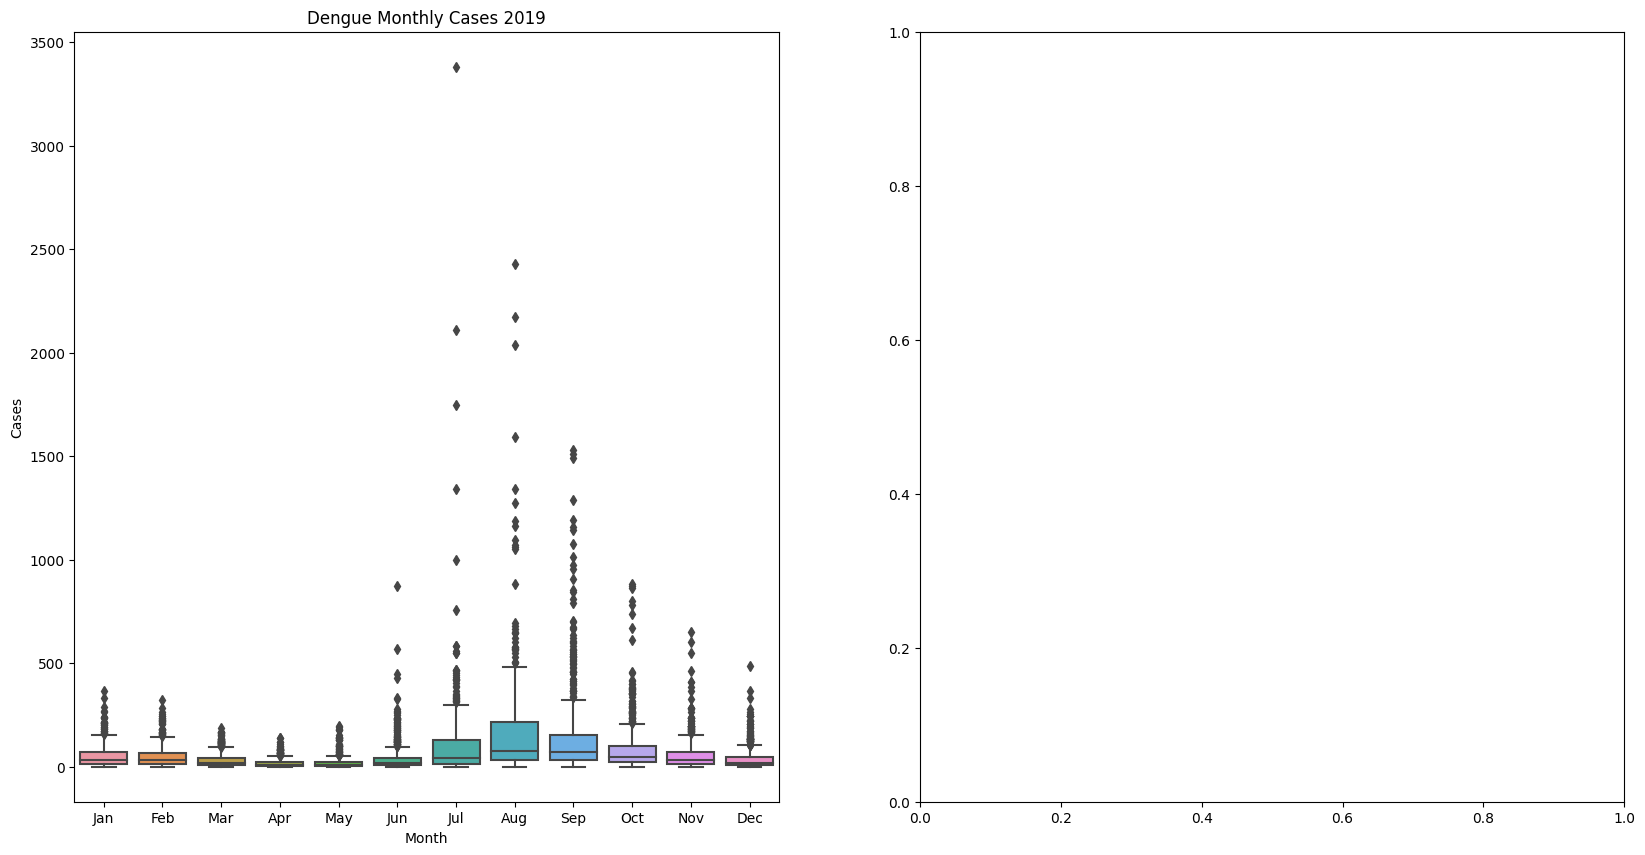

In [14]:
dengue2019_box = dengue2019.copy()
dengue2019_box['month'] = [d.strftime('%b') for d in dengue2019_box.date]
dengue2019_box["month_num"] = dengue2019_box["date"].dt.month
dengue2019_box = dengue2019_box.sort_values("month_num")

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axes[0] = sns.boxplot(x=dengue2019_box['month'],y=dengue2019_box["cases"],ax = axes[0])
axes[0].set_title("Dengue Monthly Cases 2019")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Cases")

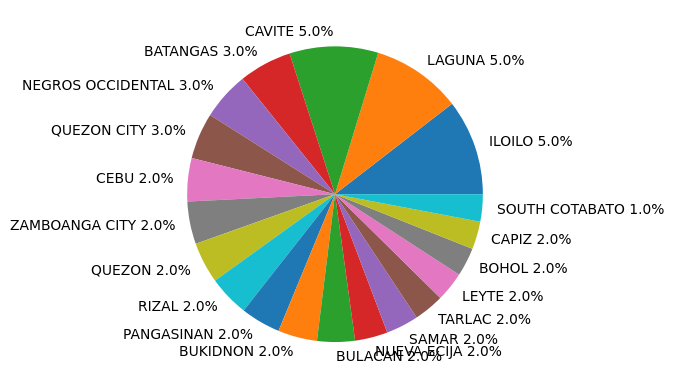

In [18]:
pie_loc = list(set(dengue2019_sct["loc"]))
sum_list = []
for i in pie_loc:
  sum_list.append(dengue2019_sct.loc[dengue2019_sct['loc'] == i ,'cases'].sum())

pie_df = pd.DataFrame()
pie_df["Location"] = pie_loc
pie_df["Total Cases"] = sum_list
pie_df["Total Cases"] = pie_df["Total Cases"].astype(str).astype(int)

g = []
for i in range(len(pie_df["Total Cases"])):
  g.append(pie_df['Location'].iloc[i] + " " + str((round(pie_df['Total Cases'].iloc[i]/pie_df["Total Cases"].sum(),2))*100)+"%")

pie_df["ForLabeling"] =  g
pie_df = pie_df.sort_values(by=['Total Cases'], ascending=False)
pie_df = pie_df[0:20]

plt.pie(pie_df["Total Cases"], labels = pie_df["ForLabeling"])
#plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

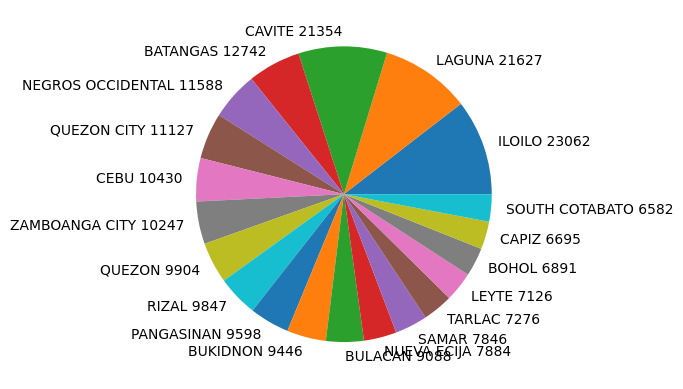

In [19]:
pie_df = pd.DataFrame()
pie_df["Location"] = pie_loc
pie_df["Total Cases"] = sum_list
pie_df["Total Cases"] = pie_df["Total Cases"].astype(str).astype(int)

g = []
for i in range(len(pie_df["Total Cases"])):
  g.append(pie_df['Location'].iloc[i] + " " + str((round(pie_df['Total Cases'].iloc[i]))))

pie_df["ForLabeling"] =  g
pie_df = pie_df.sort_values(by=['Total Cases'], ascending=False)
pie_df = pie_df[0:20]

plt.pie(pie_df["Total Cases"], labels = pie_df["ForLabeling"])

plt.show()